In [1]:
!pip install scipy

In [2]:
!pip install kagglehub tensorflow numpy

In [3]:
import tensorflow as tf

print("Versão do TensorFlow:", tf.__version__)
print("GPUs disponíveis (True se houver):", tf.config.list_physical_devices('GPU'))

# Lista todas as GPUs detectadas
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Configura para crescimento dinâmico de memória (opcional, mas recomendado)
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print(f"Sua GPU {gpus[0].name} foi detectada e configurada.")
  except RuntimeError as e:
    # Erros de configuração de memória devem ser tratados aqui.
    print(e)
else:
  print("Nenhuma GPU detectada. Verifique as instalações CUDA e cuDNN.")

2025-12-14 00:18:49.906271: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-14 00:18:51.907951: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-14 00:18:55.843216: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Versão do TensorFlow: 2.20.0
GPUs disponíveis (True se houver): []
Nenhuma GPU detectada. Verifique as instalações CUDA e cuDNN.


2025-12-14 00:18:59.265284: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


/home/tailan/Imagens/Auxi/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



--- Download Concluído ---
Diretório Raiz do Dataset: /home/tailan/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray

--- Carregando Dados ---
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Mapeamento de Classes: {'NORMAL': 0, 'PNEUMONIA': 1}

--- Calculando Pesos de Classe ---
Pesos de Classe calculados (0=NORMAL, 1=PNEUMONIA): {0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}

--- Construindo Modelo ResNet50 com Dropout ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


--- Iniciando Treinamento Corrigido ---
Epoch 1/30


2025-12-14 00:19:10.510700: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.
2025-12-14 00:19:11.176607: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 106463232 exceeds 10% of free system memory.
2025-12-14 00:19:11.950364: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25690112 exceeds 10% of free system memory.
2025-12-14 00:19:11.978191: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25690112 exceeds 10% of free system memory.
2025-12-14 00:19:11.978223: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.


163/163 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.6087 - loss: 0.6769 - precision: 0.8247 - recall: 0.6010 - val_accuracy: 0.7500 - val_loss: 0.6182 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.7331 - loss: 0.5649 - precision: 0.8864 - recall: 0.7350 - val_accuracy: 0.6250 - val_loss: 0.6221 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.7715 - loss: 0.5153 - precision: 0.9066 - recall: 0.7719 - val_accuracy: 0.6250 - val_loss: 0.5720 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.7765 - loss: 0.4923 - precision: 0.9126 - recall: 0.7732 - val_accuracy: 0.6250 - val_loss: 0.5361 - val_precision: 0.6000 - val_recall: 0.7500
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.7885 - loss: 0.4738 - precision: 0.9172 - recall: 0.7863 - val_accuracy: 0.6875 - val_loss: 0.5399 -


Acurácia no Teste: 0.8349
Recall (Sensibilidade): 0.8641
Precisão: 0.8708

Modelo Salvo como: modelo_pneumonia_resnet50_otimizado.h5

--- Calculando Matriz de Confusão ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step

--- Relatório de Classificação Final ---
               precision    recall  f1-score   support

   NORMAL (0)       0.78      0.79      0.78       234
PNEUMONIA (1)       0.87      0.86      0.87       390

     accuracy                           0.83       624
    macro avg       0.82      0.83      0.82       624
 weighted avg       0.84      0.83      0.84       624



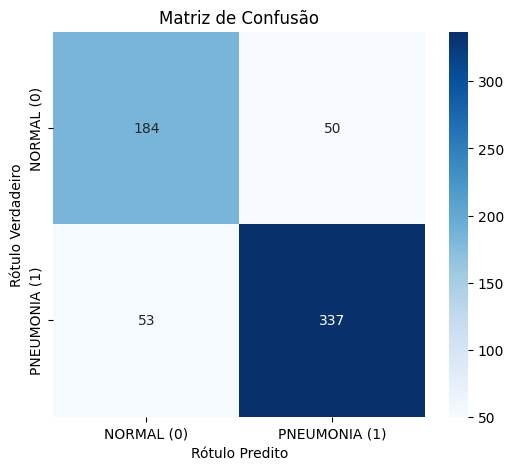


--- Plotando Histórico de Treinamento ---


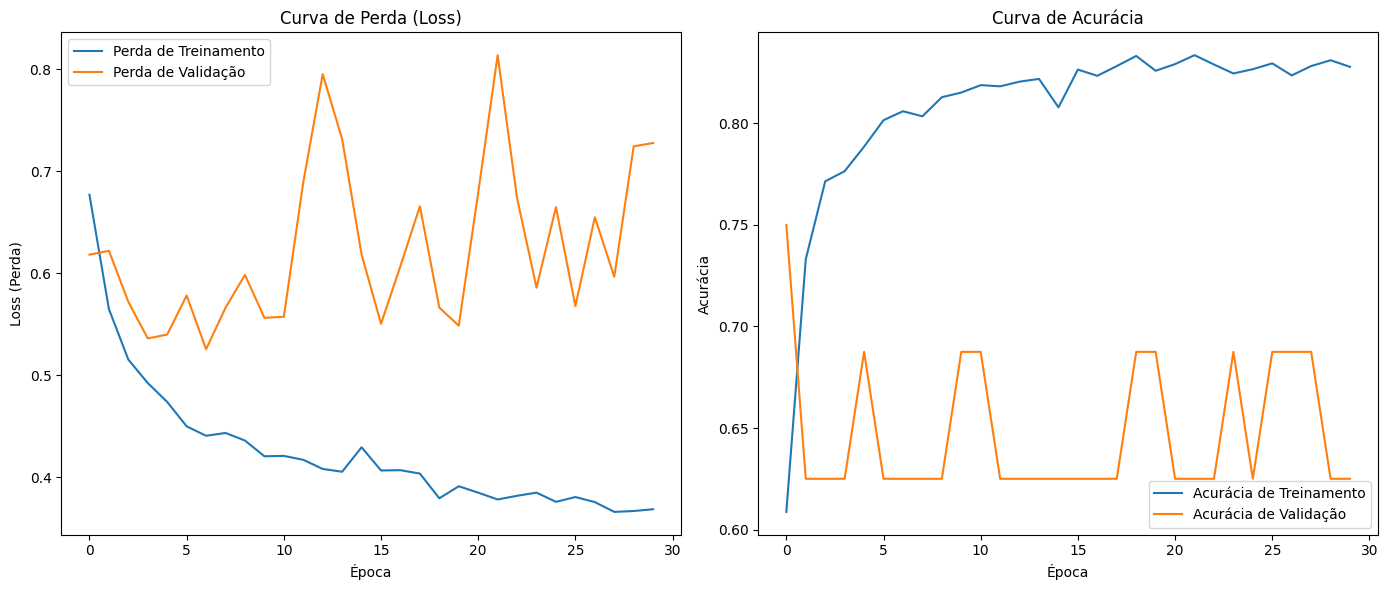

In [4]:
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
# Adicionamos Dropout para regularização
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout 
from tensorflow.keras.models import Model
import numpy as np
import os
# Usado para calcular os pesos de classes
from sklearn.utils import class_weight 
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. DOWNLOAD DO DATASET ---
try:
    # Este é o comando para download do dataset
    path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
    # Ajuste o DATA_DIR para o caminho correto dentro do download
    DATA_DIR = os.path.join(path, "chest_xray")
    print("\n--- Download Concluído ---")
    print(f"Diretório Raiz do Dataset: {DATA_DIR}")

except Exception as e:
    print(f"Erro ao baixar o dataset do Kaggle Hub. Erro: {e}")
    # Se o erro persistir, defina o caminho manual aqui, e.g.: DATA_DIR = './caminho/para/chest_xray'
    exit()

# --- 2. CONFIGURAÇÕES PRINCIPAIS ---
IMG_SIZE = (224, 224) 
BATCH_SIZE = 32
NUM_EPOCHS = 30 # 10 épocas para um melhor aprendizado após as correções
MODEL_FILENAME = 'modelo_pneumonia_resnet50_otimizado.h5'

# --- 3. PREPARAÇÃO E AUMENTO DE DADOS ---
# Gerador de Treinamento (com Aumento de Dados e Normalização)
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=15, zoom_range=0.1,
    shear_range=0.1, horizontal_flip=True, fill_mode='nearest'
)
# Gerador para Validação e Teste (apenas Normalização)
val_test_datagen = ImageDataGenerator(rescale=1./255)

print("\n--- Carregando Dados ---")

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'train'), target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary' 
)
validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'val'), target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'test'), target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False 
)
CLASS_INDICES = train_generator.class_indices
print(f"Mapeamento de Classes: {CLASS_INDICES}") 


# --- 4. CÁLCULO DE PESOS DE CLASSE (Para corrigir Desbalanceamento) ---
print("\n--- Calculando Pesos de Classe ---")

y_train = train_generator.classes

# Calcula os pesos automaticamente
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))
print(f"Pesos de Classe calculados (0=NORMAL, 1=PNEUMONIA): {class_weights}")


# --- 5. CONSTRUÇÃO DO MODELO COM DROPOUT (Anti-Overfitting) ---
print("\n--- Construindo Modelo ResNet50 com Dropout ---")

# Carregar o modelo base (Transfer Learning)
base_model = ResNet50(weights='imagenet', include_top=False, 
                      input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Congelar as camadas
for layer in base_model.layers:
    layer.trainable = False

# Adicionar novas camadas de classificação OTIMIZADAS
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # <--- DROPOUT (50%) para regularização
predictions = Dense(1, activation='sigmoid')(x) 

model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy', 
                      tf.keras.metrics.Recall(name='recall'), 
                      tf.keras.metrics.Precision(name='precision')])
model.summary()


# --- 6. TREINAMENTO CORRIGIDO (Solução para o TypeError) ---

print("\n--- Iniciando Treinamento Corrigido ---")

# REMOÇÃO DOS PARÂMETROS workers, use_multiprocessing e max_queue_size
# para evitar o TypeError na sua versão do Keras.
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    
    # Parâmetro de balanceamento de classes
    class_weight=class_weights,      
)

print("Treinamento concluído. Salvando e avaliando.")


# --- 7. AVALIAÇÃO E SALVAMENTO ---

print("\n--- Avaliação no Conjunto de Teste ---")
test_results = model.evaluate(test_generator)

print(f"\nAcurácia no Teste: {test_results[1]:.4f}")
print(f"Recall (Sensibilidade): {test_results[2]:.4f}")
print(f"Precisão: {test_results[3]:.4f}") 

model.save(MODEL_FILENAME) 
print(f"\nModelo Salvo como: {MODEL_FILENAME}")


# --- 8. MATRIZ DE CONFUSÃO E PLOTAGEM DO HISTÓRICO ---

# 8.1 Matriz de Confusão
print("\n--- Calculando Matriz de Confusão ---")
test_generator.reset() 
y_pred_probs = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
target_names = ['NORMAL (0)', 'PNEUMONIA (1)']

print("\n--- Relatório de Classificação Final ---")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

# 8.2 Plot do Histórico
print("\n--- Plotando Histórico de Treinamento ---")

def plot_training_history(history):
    plt.figure(figsize=(14, 6))
    
    # PLOT DA PERDA (LOSS)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], label='Perda de Validação')
    plt.title('Curva de Perda (Loss)')
    plt.xlabel('Época')
    plt.ylabel('Loss (Perda)')
    plt.legend()
    
    # PLOT DA ACURÁCIA
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Curva de Acurácia')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)


# --- 9. FUNÇÃO DE PREDIÇÃO (Exemplo) ---
def prever_pneumonia(caminho_imagem, modelo, target_size=IMG_SIZE):
    """
    Carrega uma imagem e faz a predição binária (NORMAL/PNEUMONIA).
    """
    try:
        img = tf.keras.preprocessing.image.load_img(caminho_imagem, target_size=target_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) 
        img_array /= 255.0

        prob_pneumonia = modelo.predict(img_array)[0][0]
        
        if prob_pneumonia >= 0.5:
            resultado = 'PNEUMONIA'
            prob = prob_pneumonia * 100
        else:
            resultado = 'NORMAL'
            prob = (1 - prob_pneumonia) * 100

        print(f"\nImagem Analisada: {os.path.basename(caminho_imagem)}")
        print(f"Resultado Predito: **{resultado}**")
        print(f"Probabilidade de {resultado}: **{prob:.2f}%**")
        

    except Exception as e:
        print(f"Não foi possível processar a imagem. Erro: {e}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step

--- Relatório de Classificação ---
               precision    recall  f1-score   support

   NORMAL (0)       0.78      0.79      0.78       234
PNEUMONIA (1)       0.87      0.86      0.87       390

     accuracy                           0.83       624
    macro avg       0.82      0.83      0.82       624
 weighted avg       0.84      0.83      0.84       624


--- Matriz de Confusão ---
[[184  50]
 [ 53 337]]


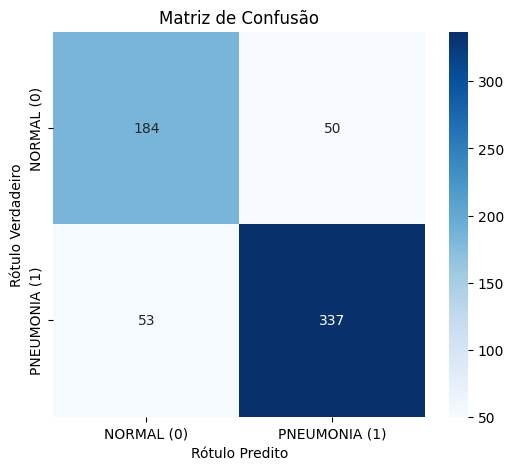

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o modelo salvo (necessário se rodar em uma nova sessão)
try:
    model = tf.keras.models.load_model(MODEL_FILENAME)
except Exception:
    print("Modelo já está carregado ou falha ao recarregar.")

# 1. Obter as Previsões (Probabilidades)
# O test_generator deve estar com shuffle=False (como configurado anteriormente)
test_generator.reset() # Garante que começamos do início
y_pred_probs = model.predict(test_generator, steps=len(test_generator))

# 2. Converter Probabilidades em Classes Binárias (0 ou 1)
# Usando 0.5 como limiar (threshold)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# 3. Obter os Rótulos Verdadeiros (True Labels)
y_true = test_generator.classes

# 4. Criar a Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_classes)

print("\n--- Relatório de Classificação ---")
target_names = ['NORMAL (0)', 'PNEUMONIA (1)']
print(classification_report(y_true, y_pred_classes, target_names=target_names))

print("\n--- Matriz de Confusão ---")
print(cm)

# 5. Visualizar a Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

In [6]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install numpy


--- Download Concluído ---
Diretório Raiz do Dataset: /home/tailan/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray

--- Carregando Dados ---
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Mapeamento de Classes: {'NORMAL': 0, 'PNEUMONIA': 1}

--- Calculando Pesos de Classe ---
Pesos de Classe calculados (0=NORMAL, 1=PNEUMONIA): {0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}

--- Construindo Modelo ResNet50 com Dropout ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


--- Iniciando Treinamento Corrigido ---
Epoch 1/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.6072 - loss: 0.6824 - precision: 0.8210 - recall: 0.6026 - val_accuracy: 0.6250 - val_loss: 0.6118 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 2/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.7195 - loss: 0.5666 - precision: 0.8750 - recall: 0.7262 - val_accuracy: 0.5625 - val_loss: 0.6836 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.7742 - loss: 0.5092 - precision: 0.9036 - recall: 0.7791 - val_accuracy: 0.6250 - val_loss: 0.5587 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 4/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.7845 - loss: 0.4781 - precision: 0.9129 - recall: 0.7848 - val_accuracy: 0.6250 - val_loss: 0.6376 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 5/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7916 - loss: 0.4707 - precision: 0.9214 - recall


Acurácia no Teste: 0.7692
Recall (Sensibilidade): 0.6718
Precisão: 0.9424

Modelo Salvo como: modelo_pneumonia_resnet50_otimizado.h5

--- Calculando Matriz de Confusão ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step

--- Relatório de Classificação Final ---
               precision    recall  f1-score   support

   NORMAL (0)       0.63      0.93      0.75       234
PNEUMONIA (1)       0.94      0.67      0.78       390

     accuracy                           0.77       624
    macro avg       0.79      0.80      0.77       624
 weighted avg       0.83      0.77      0.77       624



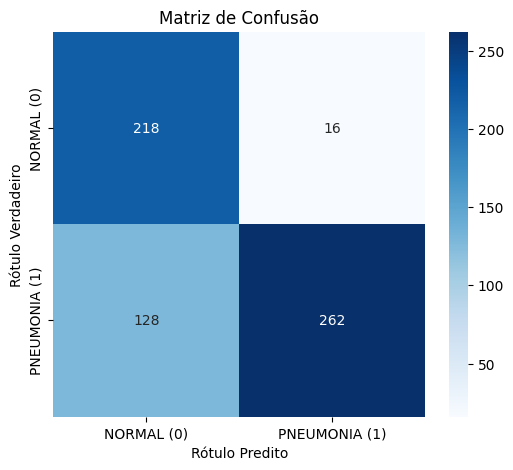


--- Plotando Histórico de Treinamento ---


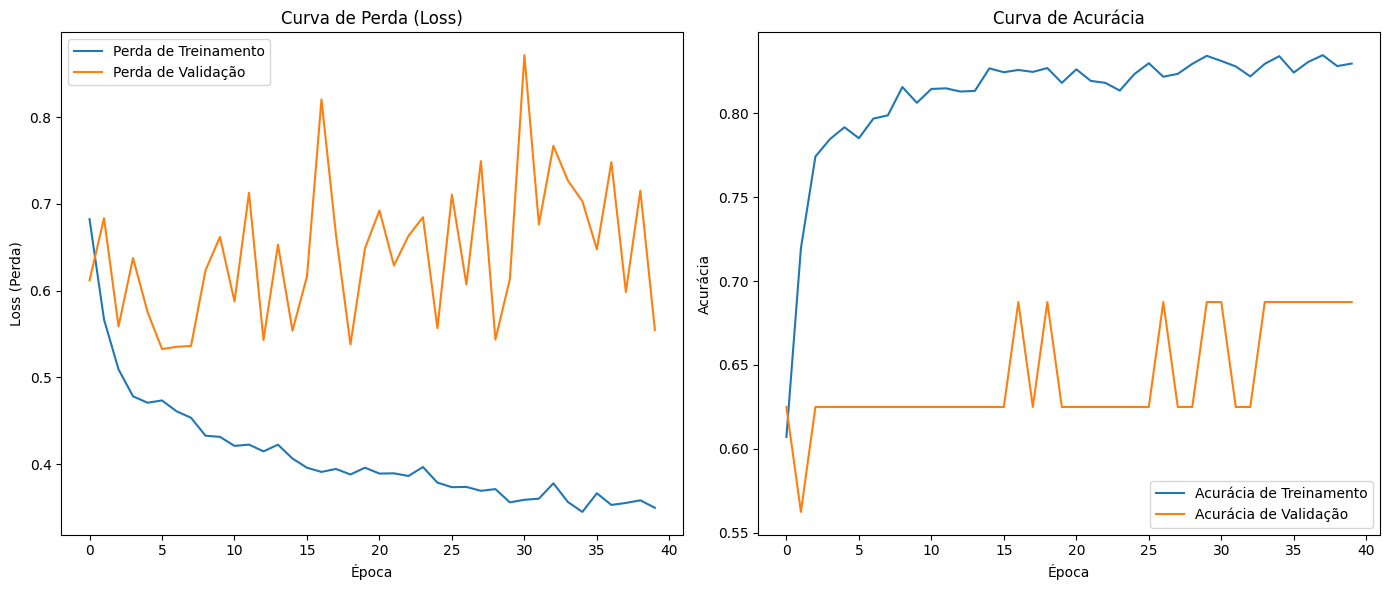

In [7]:
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
# IMPORTANTE: Adicionamos Dropout para regularização
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout 
from tensorflow.keras.models import Model
import numpy as np
import os
# IMPORTANTE: Usado para calcular os pesos de classes
from sklearn.utils import class_weight 
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. DOWNLOAD DO DATASET ---
try:
    # Este é o comando para download do dataset
    path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
    DATA_DIR = os.path.join(path, "chest_xray")
    print("\n--- Download Concluído ---")
    print(f"Diretório Raiz do Dataset: {DATA_DIR}")

except Exception as e:
    print(f"Erro ao baixar o dataset do Kaggle Hub. Use o caminho manual. Erro: {e}")
    exit()

# --- 2. CONFIGURAÇÕES PRINCIPAIS ---
IMG_SIZE = (224, 224) 
BATCH_SIZE = 32
NUM_EPOCHS = 40 
MODEL_FILENAME = 'modelo_pneumonia_resnet50_otimizado.h5'

# --- 3. PREPARAÇÃO E AUMENTO DE DADOS ---
# Geradores
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=15, zoom_range=0.1,
    shear_range=0.1, horizontal_flip=True, fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

print("\n--- Carregando Dados ---")

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'train'), target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary' 
)
validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'val'), target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'test'), target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False 
)
CLASS_INDICES = train_generator.class_indices
print(f"Mapeamento de Classes: {CLASS_INDICES}") 


# --- 4. CÁLCULO DE PESOS DE CLASSE (Para corrigir Desbalanceamento) ---
print("\n--- Calculando Pesos de Classe ---")

y_train = train_generator.classes

class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))
print(f"Pesos de Classe calculados (0=NORMAL, 1=PNEUMONIA): {class_weights}")


# --- 5. CONSTRUÇÃO DO MODELO COM DROPOUT (Anti-Overfitting) ---

print("\n--- Construindo Modelo ResNet50 com Dropout ---")

base_model = ResNet50(weights='imagenet', include_top=False, 
                      input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # <-- Dropout (50%) para combater o Overfitting
predictions = Dense(1, activation='sigmoid')(x) 

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy', 
                      tf.keras.metrics.Recall(name='recall'), 
                      tf.keras.metrics.Precision(name='precision')])
model.summary()


# --- 6. TREINAMENTO CORRIGIDO (Resolvendo o TypeError) ---

print("\n--- Iniciando Treinamento Corrigido ---")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    
    # NOVOS PARÂMETROS CORRIGIDOS:
    class_weight=class_weights,      # <--- Mantido: Corrige o Desbalanceamento
    # workers, use_multiprocessing, e max_queue_size FORAM REMOVIDOS.
)

print("Treinamento concluído. Salvando e avaliando.")


# --- 7. AVALIAÇÃO E SALVAMENTO ---

print("\n--- Avaliação no Conjunto de Teste ---")
test_results = model.evaluate(test_generator)

print(f"\nAcurácia no Teste: {test_results[1]:.4f}")
print(f"Recall (Sensibilidade): {test_results[2]:.4f}")
print(f"Precisão: {test_results[3]:.4f}") 

model.save(MODEL_FILENAME) 
print(f"\nModelo Salvo como: {MODEL_FILENAME}")


# --- 8. MATRIZ DE CONFUSÃO E PLOTAGEM DO HISTÓRICO ---

# 8.1 Matriz de Confusão
print("\n--- Calculando Matriz de Confusão ---")
test_generator.reset() 
y_pred_probs = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
target_names = ['NORMAL (0)', 'PNEUMONIA (1)']

print("\n--- Relatório de Classificação Final ---")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

# 8.2 Plot do Histórico
print("\n--- Plotando Histórico de Treinamento ---")

def plot_training_history(history):
    plt.figure(figsize=(14, 6))
    
    # PLOT DA PERDA (LOSS)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], label='Perda de Validação')
    plt.title('Curva de Perda (Loss)')
    plt.xlabel('Época')
    plt.ylabel('Loss (Perda)')
    plt.legend()
    
    # PLOT DA ACURÁCIA
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Curva de Acurácia')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    
    plt.tight_layout()
    plt.show() 

plot_training_history(history)


# --- 9. FUNÇÃO DE PREDIÇÃO ---
def prever_pneumonia(caminho_imagem, modelo, target_size=IMG_SIZE):
    """
    Carrega uma imagem e faz a predição binária (NORMAL/PNEUMONIA).
    """
    try:
        img = tf.keras.preprocessing.image.load_img(caminho_imagem, target_size=target_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) 
        img_array /= 255.0

        prob_pneumonia = modelo.predict(img_array)[0][0]
        
        if prob_pneumonia >= 0.5:
            resultado = 'PNEUMONIA'
            prob = prob_pneumonia * 100
        else:
            resultado = 'NORMAL'
            prob = (1 - prob_pneumonia) * 100

        print(f"\nImagem Analisada: {os.path.basename(caminho_imagem)}")
        print(f"Resultado Predito: **{resultado}**")
        print(f"Probabilidade de {resultado}: **{prob:.2f}%**")
        

    except Exception as e:
        print(f"Não foi possível processar a imagem. Erro: {e}")

In [8]:
caminho_imagem = './r.jpg' 
prever_pneumonia(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Imagem Analisada: r.jpg
Resultado Predito: **NORMAL**
Probabilidade de NORMAL: **53.70%**


In [9]:
caminho_imagem = './pulmao.jpeg' 
prever_pneumonia(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Imagem Analisada: pulmao.jpeg
Resultado Predito: **PNEUMONIA**
Probabilidade de PNEUMONIA: **62.73%**


In [10]:
caminho_imagem = './pulmao1.jpeg' 
prever_pneumonia(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

Imagem Analisada: pulmao1.jpeg
Resultado Predito: **NORMAL**
Probabilidade de NORMAL: **93.87%**


In [11]:
caminho_imagem = './images.jpeg' 
prever_pneumonia(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

Imagem Analisada: images.jpeg
Resultado Predito: **NORMAL**
Probabilidade de NORMAL: **59.17%**


In [12]:
caminho_imagem = './la.jpeg' 
prever_pneumonia(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Imagem Analisada: la.jpeg
Resultado Predito: **PNEUMONIA**
Probabilidade de PNEUMONIA: **85.54%**


In [13]:
caminho_imagem = './kk.jpg' 
prever_pneumonia(caminho_imagem, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Imagem Analisada: kk.jpg
Resultado Predito: **NORMAL**
Probabilidade de NORMAL: **92.98%**
